## Data Preprocessing for Amharic Named Entity Recognition (NER)
The main objective of this notebook is to prepare raw data for Named Entity Recognition (NER). The focus is on data ingestion from Ethiopian Telegram channels and preprocessing Amharic text for entity extraction.

Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# Add the parent directory to the system path 
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
# importing modules from scripts 
from scripts.preprocessing import *

In [4]:
# Load the dataset
df = pd.read_csv('../data/telegram_data.csv')

Display the first few rows of the raw dataset to give an overview of the structure and content of the messages retrieved

In [5]:
df.head()

,Channel Title,Channel Username,ID,Message,Date,Media Path
0,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14841,NaN,2024-09-26 12:24:51+00:00,photos\@sinayelj_14841.jpg
1,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14840,NaN,2024-09-26 12:24:51+00:00,photos\@sinayelj_14840.jpg
2,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14839,ለኮንዶሚኒየም ለጠባብ ቤቶች ገላግሌ የሆነ ከንፁህ የሲልከን ጥሬ እቃ የተ...,2024-09-26 12:24:51+00:00,photos\@sinayelj_14839.jpg
3,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14838,NaN,2024-09-26 12:24:12+00:00,photos\@sinayelj_14838.jpg
4,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14837,NaN,2024-09-26 12:24:12+00:00,photos\@sinayelj_14837.jpg


In [6]:
df.tail()

,Channel Title,Channel Username,ID,Message,Date,Media Path
4618,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,599,NaN,2021-04-16 18:12:10+00:00,photos\@sinayelj_599.jpg
4619,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,598,Baby potty\n0905707448\n0945097042,2021-04-16 18:12:10+00:00,photos\@sinayelj_598.jpg
4620,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,197,NaN,2020-11-26 18:30:52+00:00,NaN
4621,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,182,ውድ የሲና ኪድስ ደምበኞች በድጋሚ ገብቷል \nየመዋኛ ገንዳ ትልቅ ሳይዝ ...,2020-11-10 06:59:31+00:00,photos\@sinayelj_182.jpg
4622,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,1,NaN,2020-07-24 10:50:43+00:00,NaN


In [7]:
# check for missing values
df.isnull().sum()

Channel Title          0
Channel Username       0
ID                     0
Message             3268
Date                   0
Media Path           310
dtype: int64

In [8]:
# drop missing values from 'Message' Column
df = df.dropna(subset=['Message'])

In [9]:
df.head()

,Channel Title,Channel Username,ID,Message,Date,Media Path
2,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14839,ለኮንዶሚኒየም ለጠባብ ቤቶች ገላግሌ የሆነ ከንፁህ የሲልከን ጥሬ እቃ የተ...,2024-09-26 12:24:51+00:00,photos\@sinayelj_14839.jpg
6,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14835,Baby romper ከላዩ ፈር ውስጡ ኮተን የሆነ\n\n2000 birr\...,2024-09-26 12:24:11+00:00,photos\@sinayelj_14835.jpg
9,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14832,Chicco 5 in 1 mama bag\nኦሪጅናል ማቴሪያል\nበሳይዙ ትልቅ\...,2024-09-26 12:20:22+00:00,photos\@sinayelj_14832.jpg
16,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14825,aiebao HIP SEAT CARRIER\nምቹ ጠንካራ የልጆች ማዘያ\nበተለ...,2024-09-26 12:19:20+00:00,photos\@sinayelj_14825.jpg
26,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14815,Kids mat \n\n💥4100 ብር\n\nSize 1.80*2m\n\nfree...,2024-09-25 06:15:53+00:00,photos\@sinayelj_14815.jpg


In [10]:
df.isnull().sum()

Channel Title        0
Channel Username     0
ID                   0
Message              0
Date                 0
Media Path          72
dtype: int64

In [11]:
df['Message'].unique()

array(['ለኮንዶሚኒየም ለጠባብ ቤቶች ገላግሌ የሆነ ከንፁህ የሲልከን ጥሬ እቃ የተሰራ የልጆች ማጠቢያ  ምስሉ ላይ እንደሚያዩት መታጠፍ መዘርጋት የሚችል   3350ብር   ይደውሉልን እርሶ መምጣት ባይመቾ እኛ ያሉበት ድረስ እናደርስሎታለን ስልክ 0905707448 0909003864 ሲና የተመረጡና ጥራታቸውን የጠበቁ የልጆች እቃ አስመጪ \n\n\n0909003864\n0905707448  \n\nእቃ ለማዘዝ ከስር ያለውን ሊንኮች በመጫን ማዘዝ ትችላላቹ  \n\n@sinasinaye\n\n@sinayalj2\n\nአድራሻ\n\n 1️⃣ቁጥር1 ገርጂ ኢምፔሪያል ከሳሚ ህንፃ ጎን አልፎዝ ፕላዛ ግራውንድ ላይ እንደገቡ ያገኙናል\n\n2️⃣ቁጥር2 4ኪሎ ቅድስት ስላሴ ህንፃ ማለትም ከብልፅግና ዋናፅፈት ቤት ህንፃ በስተ ቀኝ ባለው አስፓልት 20ሜትር ዝቅ እንዳሉ ሀበሻ ኮፊ የሚገኝበት ቀይ ሸክላ ህንፃ 2ተኛ ፎቅ ላይ ያገኙናል\n\n3️⃣ቁጥር3 ብስራተ ገብርኤል ላፍቶ ሞል መግቢያው ፊት ለፊት የሚገኘው የብስራተ ገብርኤል ቤተ ክርስቲያን ህንፃ አንደኛ ፎቅ ላይ ደረጃ እንደወጣቹ በስተግራ በኩል ሱቅ ቁጥር FF-09\n\nክቡራን ደምበኞቻችን ገርጂ አልፎዝ ፕላዛ ላይ አራት ኪሎ ቅድስት ስላሴ እንዲሁም ብስራተ ገብሬል ያሉት ሱቆቻችን ሲመጡ  አስተማማኝ ሰፊ ፓርኪንግ ያላቸው መሆናቸውን በታላቅ ደስታ እናበስራለን🙏🙏🙏',
       'Baby romper   ከላዩ ፈር ውስጡ ኮተን የሆነ\n\n2000 birr\n\nFree delivery \n\n0909003864\n0905707448  \n\nእቃ ለማዘዝ ከስር ያለውን ሊንኮች በመጫን ማዘዝ ትችላላቹ  \n\n@sinasinaye\n\n@sinayalj2\n\nአድራሻ\n\n 1️⃣ቁጥር1 ገርጂ ኢምፔሪያል ከሳሚ ህንፃ ጎን አልፎዝ ፕላዛ ግራውንድ ላይ እንደገቡ ያገ

- removing unnecessary symbols, numbers, and punctuation from the text data as well as remove english letters. This step is essential for ensuring the text is properly formatted for tokenization and further analysis.
- normalizes Amharic text using Unicode normalization (NFKC form).


In [14]:
# Preprocess the dataset
preprocessed_data = preprocess_dataset(df.to_dict('records'))

In [15]:
# Convert preprocessed data back to a DataFrame
preprocessed_df = pd.DataFrame(preprocessed_data)

In [16]:
# Basic statistics
print("Total number of messages:", len(preprocessed_df))
print("Number of unique channels:", preprocessed_df['Channel_Username'].nunique())

Total number of messages: 1355
Number of unique channels: 1


### Tokenization
 tokenization is performed here. Tokenizing the text involves splitting it into individual words or tokens, which is important for preparing the data for the NER labeling process.

In [18]:
# Token analysis
all_tokens = [token for tokens in preprocessed_df['tokens'] for token in tokens]
token_counts = Counter(all_tokens)

In [19]:
print("Total number of tokens:", len(all_tokens))
print("Number of unique tokens:", len(token_counts))

Total number of tokens: 75972
Number of unique tokens: 3501


### print the unique tokens 

In [20]:
unique_tokens = list(token_counts.keys())  # Get the unique tokens
print("Unique tokens:", unique_tokens)

Unique tokens: ['ለኮንዶሚኒየም', 'ለጠባብ', 'ቤቶች', 'ገላግሌ', 'የሆነ', 'ከንፁህ', 'የሲልከን', 'ጥሬ', 'እቃ', 'የተሰራ', 'የልጆች', 'ማጠቢያ', 'ምስሉ', 'ላይ', 'እንደሚያዩት', 'መታጠፍ', 'መዘርጋት', 'የሚችል', '3350ብር', 'ይደውሉልን', 'እርሶ', 'መምጣት', 'ባይመቾ', 'እኛ', 'ያሉበት', 'ድረስ', 'እናደርስሎታለን', 'ስልክ', '0905707448', '0909003864', 'ሲና', 'የተመረጡና', 'ጥራታቸውን', 'የጠበቁ', 'አስመጪ', 'ለማዘዝ', 'ከስር', 'ያለውን', 'ሊንኮች', 'በመጫን', 'ማዘዝ', 'ትችላላቹ', '@', '@2', 'አድራሻ', 'ቁጥር', 'ገርጂ', 'ኢምፔሪያል', 'ከሳሚ', 'ህንፃ', 'ጎን', 'አልፎዝ', 'ፕላዛ', 'ግራውንድ', 'እንደገቡ', 'ያገኙናል', '2ቁጥር2', '4ኪሎ', 'ቅድስት', 'ስላሴ', 'ማለትም', 'ከብልፅግና', 'ዋናፅፈት', 'ቤት', 'በስተ', 'ቀኝ', 'ባለው', 'አስፓልት', '20ሜትር', 'ዝቅ', 'እንዳሉ', 'ሀበሻ', 'ኮፊ', 'የሚገኝበት', 'ቀይ', 'ሸክላ', '2ተኛ', 'ፎቅ', '3ቁጥር3', 'ብስራተ', 'ገብርኤል', 'ላፍቶ', 'ሞል', 'መግቢያው', 'ፊት', 'ለፊት', 'የሚገኘው', 'የብስራተ', 'ቤተ', 'ክርስቲያን', 'አንደኛ', 'ደረጃ', 'እንደወጣቹ', 'በስተግራ', 'በኩል', 'ሱቅ', '-09', 'ክቡራን', 'ደምበኞቻችን', 'አራት', 'ኪሎ', 'እንዲሁም', 'ገብሬል', 'ያሉት', 'ሱቆቻችን', 'ሲመጡ', 'አስተማማኝ', 'ሰፊ', 'ፓርኪንግ', 'ያላቸው', 'መሆናቸውን', 'በታላቅ', 'ደስታ', 'እናበስራለን', 'ከላዩ', 'ፈር', 'ውስጡ', 'ኮተን', '2000', 'ብራንቾቻችን', 'ለመግዛት', 'ያለው', 'ጊቢ', 'ህን

### most common tokens

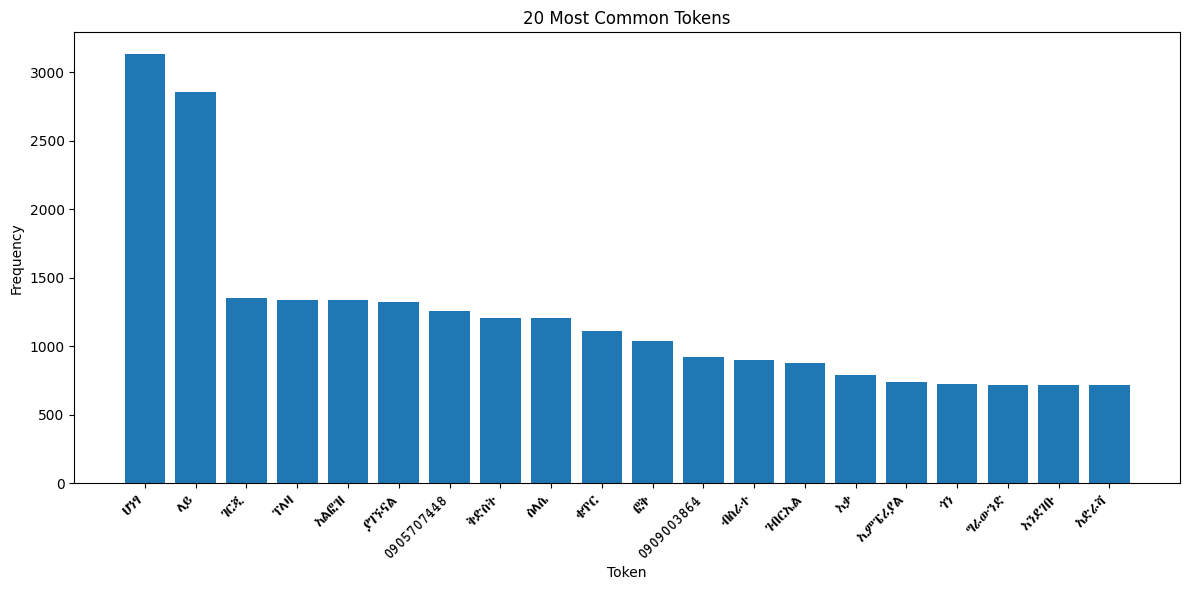

In [21]:
from matplotlib import font_manager
font='./washrab.ttf'
property = font_manager.FontProperties(fname=font)
plt.figure(figsize=(12, 6))
plt.bar(*zip(*token_counts.most_common(20)))
plt.title('20 Most Common Tokens')
plt.xlabel('Token')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right', fontproperties=property)
plt.tight_layout()
plt.show()

### Message length analysis

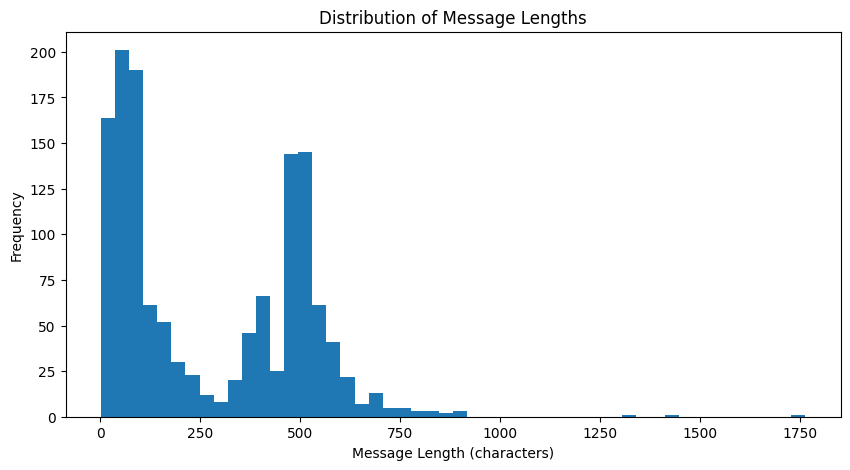

In [22]:
# Message length analysis
preprocessed_df['message_length'] = preprocessed_df['cleaned_message'].str.len()

plt.figure(figsize=(10, 5))
plt.hist(preprocessed_df['message_length'], bins=50)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length (characters)')
plt.ylabel('Frequency')
plt.show()

### Time series analysis

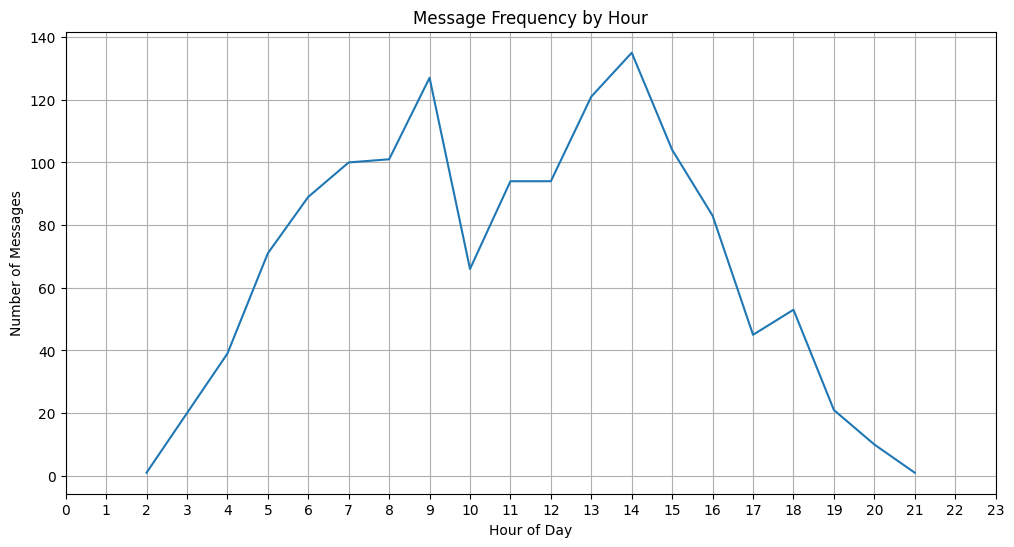

In [23]:
# Time analysis
preprocessed_df['Date'] = pd.to_datetime(preprocessed_df['Date'])
preprocessed_df['hour'] = preprocessed_df['Date'].dt.hour

hourly_counts = preprocessed_df['hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(hourly_counts.index, hourly_counts.values)
plt.title('Message Frequency by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Messages')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

### Channel analysis
we used only single channel [SinayelJ](https://t.me/sinayelj)


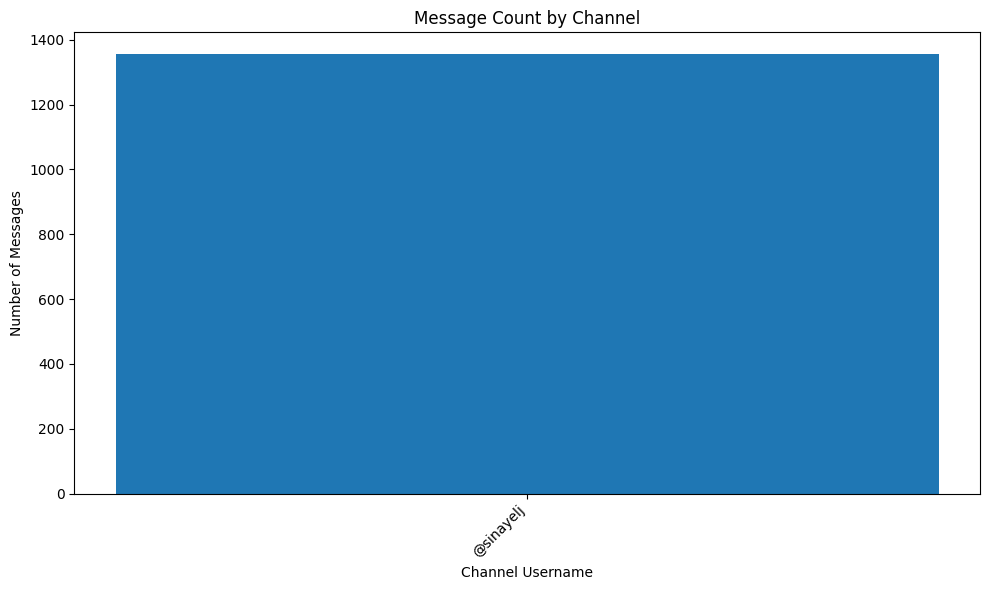

In [25]:
# Channel analysis
channel_counts = preprocessed_df['Channel_Username'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(channel_counts.index, channel_counts.values)
plt.title('Message Count by Channel')
plt.xlabel('Channel Username')
plt.ylabel('Number of Messages')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Media analysis

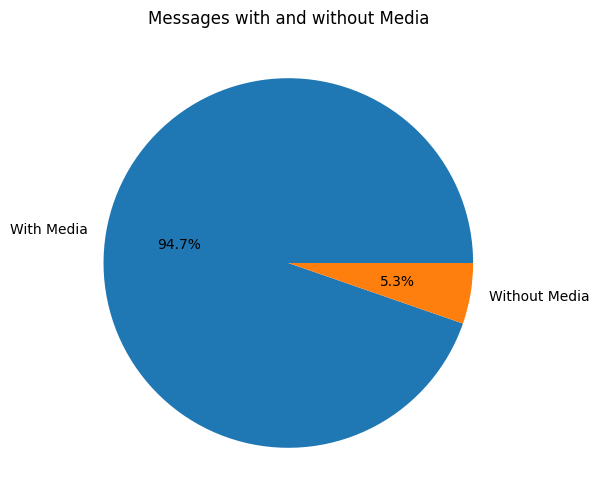

In [26]:
# Media analysis
media_counts = preprocessed_df['Media_Path'].notna().value_counts()
plt.figure(figsize=(8, 6))
plt.pie(media_counts, labels=['With Media', 'Without Media'], autopct='%1.1f%%')
plt.title('Messages with and without Media')
plt.show()

In [27]:
 #Save preprocessed data
preprocessed_df.to_csv('../data/preprocessed_telegram_messages.csv', index=False)
print("Preprocessed data saved to 'preprocessed_telegram_messages.csv'")

Preprocessed data saved to 'preprocessed_telegram_messages.csv'
